#KERAS PROJECT - 1

#GEMSTONE PRICE PREDICTION PROJECT

This data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

#IMPORTS

In [5]:
#Import Numpy And Pandas
import numpy as np
import pandas as pd

In [9]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#GET DATA

In [14]:
#Read The Data from gem
df = pd.read_csv('gem.csv')

In [16]:
#Head Of df
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [18]:
#Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [20]:
#Describe on df
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


#EXPLORATORY DATA ANALYSIS

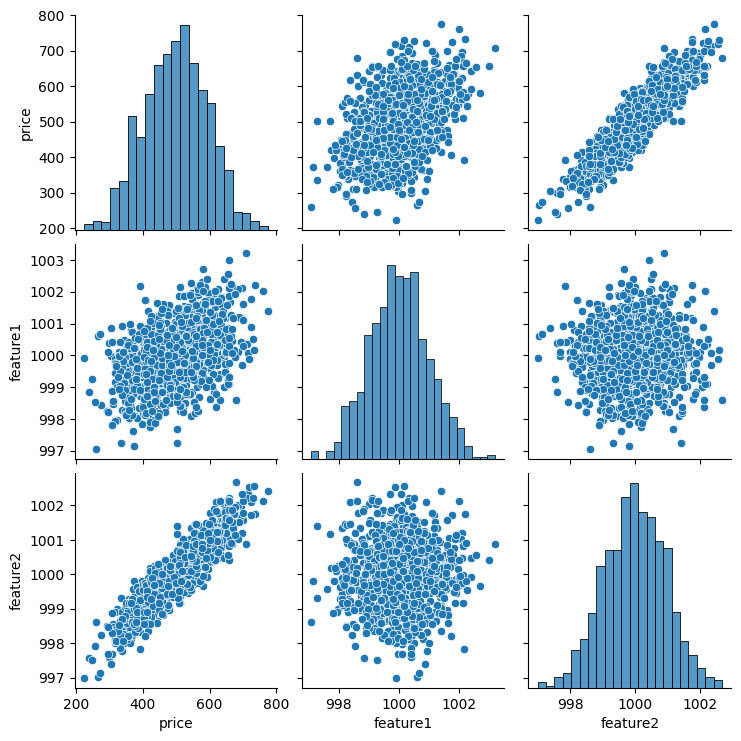

In [27]:
#Pairplot of df
sns.pairplot(df)

#TRAIN TEST SPLIT

In [42]:
#Import train_test_split
from sklearn.model_selection import train_test_split

In [44]:
#Perform train_test_split and convert pandas df to numpy array
x_train, x_test, y_train, y_test = train_test_split(df.drop('price',axis=1).values, df['price'].values, test_size=0.33, random_state=42)

In [46]:
x_train

array([[1001.23108741,  998.63711842],
       [ 999.38690932,  999.84959104],
       [ 998.23257257, 1001.02270174],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [48]:
x_test

array([[ 999.54121558,  999.14114328],
       [1000.61862216, 1001.11905081],
       [1000.86079375, 1000.65496339],
       [ 999.45851362, 1001.06368241],
       [ 997.61547597,  999.57440788],
       [1000.14086546, 1000.83393652],
       [ 998.39657367, 1000.89778743],
       [1000.48772914,  999.32129144],
       [ 999.37620423, 1000.841348  ],
       [1000.56800092,  999.15416846],
       [1000.60331207, 1000.99323497],
       [1001.96902295,  999.6666088 ],
       [ 999.47784011,  999.32573058],
       [ 999.15367572,  999.35665186],
       [1002.56280406, 1000.55356428],
       [1000.18750969,  999.21064524],
       [1001.48563193,  999.42770753],
       [ 999.31556397, 1002.1187026 ],
       [1000.17527252, 1001.76025939],
       [1001.02278582, 1000.28145855],
       [ 998.2993191 ,  998.89970792],
       [ 999.62911717,  999.54799684],
       [ 998.77177786,  999.23169313],
       [ 999.48763192,  998.86570158],
       [1000.2156187 , 1000.65805738],
       [ 999.64595458, 10

In [50]:
y_train

array([425.4599912 , 452.71044444, 521.7744574 , 565.24995494,
       461.52792939, 493.01201779, 606.21795936, 509.84188626,
       429.47259522, 413.10071452, 480.23012282, 602.12024979,
       355.35228879, 402.00959595, 572.67843212, 333.08087339,
       503.39000141, 378.81430465, 530.98717439, 434.69375374,
       362.91867606, 567.19470601, 602.9701103 , 643.13593178,
       527.61587693, 340.05814212, 519.46055247, 367.88499002,
       489.09760772, 490.78489309, 424.61108821, 358.85061321,
       558.34939279, 339.21223298, 576.85255167, 530.03285381,
       501.09520221, 446.36031515, 392.57787377, 498.40036414,
       422.77852605, 595.54443191, 433.09376956, 622.37147383,
       555.48566416, 575.68656759, 533.48426265, 576.67843837,
       446.61250992, 491.79240663, 485.22477592, 510.46356567,
       535.98312568, 391.26547583, 458.52789767, 657.80019814,
       441.38724011, 560.79471778, 625.08018462, 460.4308638 ,
       497.33921897, 523.53312776, 695.77282817, 392.04

In [52]:
y_test

array([402.29631873, 624.15619847, 582.4550663 , 578.58860646,
       371.22410361, 584.38110772, 514.40564086, 464.11587006,
       551.65009963, 451.8041724 , 613.95995262, 547.73198239,
       428.31614877, 413.84178036, 654.83912076, 429.21452014,
       512.04904895, 657.71868008, 674.31102047, 565.19184559,
       338.0902386 , 450.9760715 , 375.13754715, 379.10982057,
       562.05793604, 593.6677957 , 531.27754687, 423.65453319,
       656.65474461, 412.90687671, 439.49653517, 488.78691774,
       448.51914416, 685.21654079, 424.81078609, 418.45717839,
       507.44318662, 550.14246248, 503.21614081, 397.88209319,
       621.11885596, 411.57560703, 609.3840753 , 449.02606966,
       503.51419982, 578.32901814, 664.50877632, 498.6284209 ,
       316.9505926 , 478.35823792, 514.89474416, 374.19760282,
       531.66193891, 405.40016562, 637.30962074, 482.55641188,
       624.99250404, 624.24709206, 455.13953399, 484.46159148,
       492.93591939, 477.73749721, 689.1734889 , 397.62

#NORMALIZING AND SCALING THE DATA

In [55]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [57]:
#Create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [59]:
#Prevent Data Leakage by fitting on only x_train
scaler.fit(x_train)

MinMaxScaler()

In [61]:
#Scale x_train and x_test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#CREATING AND TRAINING MODEL

In [66]:
#Import Sequential Model and Dense Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
#Create a model of 4 layers with 4,4,4,1 neurons and last one will be our output layer
#Choosing activation function as rectified linear unit
model = Sequential()
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1))

In [72]:
#Compile our model because we have a regression problem we are going to use 'mse' as our loss
model.compile(optimizer='rmsprop',loss='mse')

#TRAINIG THE MODEL

In [75]:
#Fitting Our Model on our training data
model.fit(x=x_train,y=y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 254516.7656
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252518.2500 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253979.0625 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252087.8594 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 260733.1094
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257934.8438
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255637.1250
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255859.4844
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 256108.9062
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 255508.7656
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250074.5312
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255984.7188 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 256331.1719
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257416.45

Text(0.5, 0, 'Epoch')

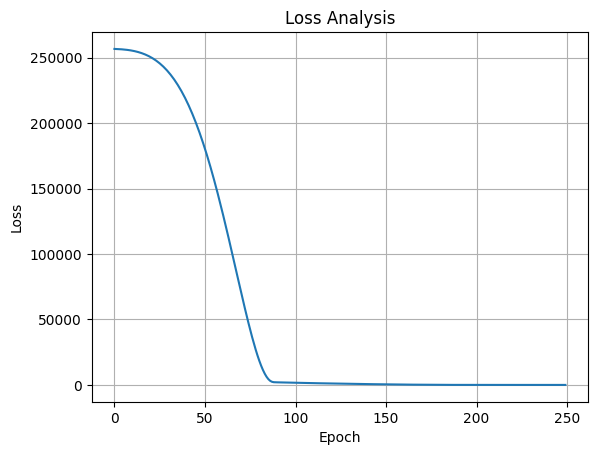

In [91]:
#Analysis of our loss
losses = model.history.history
plt.plot(losses['loss'])
plt.title('Loss Analysis')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')

#EVALUATION

In [98]:
#Calculating mse of our testing data
model.evaluate(x_test,y_test,verbose=0)

24.89948272705078

In [100]:
#Calculating mse of our training data
model.evaluate(x_train,y_train,verbose=0)

25.03554344177246

In [102]:
#Two values are very cloe to each other this means our model is working fine.

#FURTHER EVALUATIONS

In [105]:
#Predictions of our model
predictions = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [121]:
#Creating a dataframe of our model predictions and actual values
predicted_values=[]
for i in range(330):
    predicted_values.append(predictions[i][0])
pred_df = pd.DataFrame()
pred_df['Actual Values']=y_test
pred_df['Predicted Values']=predicted_values

In [123]:
#Head Of pred_df
pred_df.head()

,Actual Values,Predicted Values
0,402.296319,404.703827
1,624.156198,622.622681
2,582.455066,591.276367
3,578.588606,571.355103
4,371.224104,366.028107


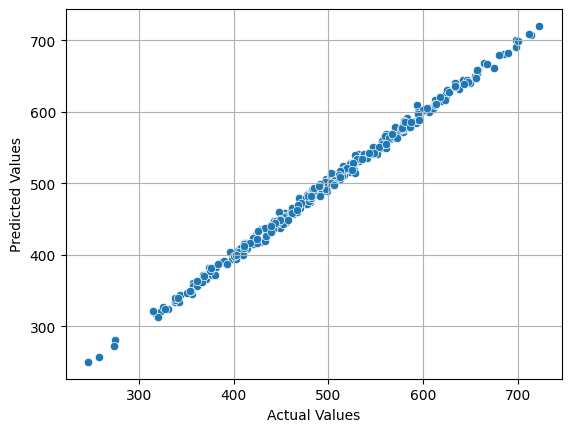

In [133]:
#Creating a scatter plot of actual prepredicted values vs actual values
sns.scatterplot(data=pred_df,y='Predicted Values',x='Actual Values')
plt.grid(True)

In [137]:
#METRICS EVALUATION
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error
print('Mean Squared Error ->',mean_squared_error(pred_df['Actual Values'],pred_df['Predicted Values']))
print('\n')
print('Root Mean Squared Error ->',root_mean_squared_error(pred_df['Actual Values'],pred_df['Predicted Values']))
print('\n')
print('Mean Absolute Error ->',mean_absolute_error(pred_df['Actual Values'],pred_df['Predicted Values']))

Mean Squared Error -> 24.899484622124216


Root Mean Squared Error -> 4.989938338509226


Mean Absolute Error -> 4.004481061003138


#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL